In [1]:
#imorting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset
quora_data = pd.read_csv("quora_dataset.csv")

In [3]:
#checking 1st five rows
quora_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
#check the shape of dataset
quora_data.shape

(404290, 6)

In [5]:
#using 50000 data
new_quora = quora_data.sample(50000)

In [6]:
#check the shape of dataset
new_quora.shape

(50000, 6)

In [7]:
#dataset information
new_quora.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 200997 to 302237
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50000 non-null  int64 
 1   qid1          50000 non-null  int64 
 2   qid2          50000 non-null  int64 
 3   question1     50000 non-null  object
 4   question2     50000 non-null  object
 5   is_duplicate  50000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ MB


In [8]:
#checking null values
new_quora.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
#checking duplicate values
new_quora.duplicated().sum()

0

In [10]:
#only using question1 & question2 data
quora_ques = new_quora[["question1","question2"]]

In [11]:
quora_ques.head()

,question1,question2
200997,What are some of your own personal stories and...,What are some of your own personal stories and...
63639,Is it theoretically possible to travel a light...,Is there a particular way physics should be?
383110,Why are the Academy Awards commonly known as t...,"How did The Academy Awards come to be called ""..."
199686,What is collaborative filtering?,What are the benefits of collaborative filtering?
380073,What are the main subjects in psychology?,Is x-box or playstation more popular in your c...


In [12]:
#replace null values with empty strings
quora_ques["question1"].fillna("", inplace=True)
quora_ques["question2"].fillna("", inplace=True)

#merging texts and applying CountVectorizer
questions = list(quora_ques["question1"]) + list(quora_ques["question2"])
cv = CountVectorizer(max_features = 3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)

In [13]:
quora_ques1 = pd.DataFrame(q1_arr, index = quora_ques.index)

quora_ques2 = pd.DataFrame(q2_arr, index = quora_ques.index)

questions_quora = pd.concat([quora_ques1, quora_ques2], axis = 1)

In [14]:
questions_quora.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
200997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
63639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
questions_quora

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
200997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
63639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130156,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
17374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
questions_quora.shape

(50000, 6000)

In [17]:
questions_quora["is_duplicate"] = quora_data["is_duplicate"]

In [18]:
questions_quora.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
200997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
63639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
199686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
X_train,X_test,y_train,y_test = train_test_split(questions_quora.iloc[:,0:-1].values, questions_quora.iloc[:,-1].values, test_size = 0.2, random_state = 2)

In [20]:
forest = RandomForestClassifier()

forest.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = forest.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred)

0.7571

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      6299
           1       0.77      0.49      0.60      3701

    accuracy                           0.76     10000
   macro avg       0.76      0.70      0.71     10000
weighted avg       0.76      0.76      0.74     10000



In [24]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5768,  531],
       [1898, 1803]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

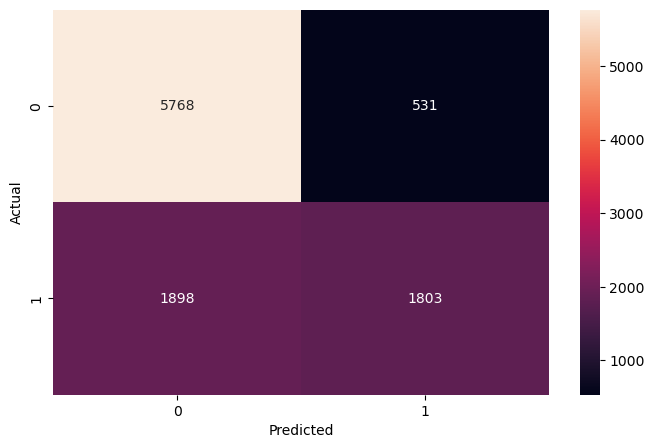

In [25]:
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [26]:
xgb = XGBClassifier()

xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [27]:
y_pred = xgb.predict(X_test)

In [28]:
accuracy_score(y_test,y_pred)

0.739

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.81      6299
           1       0.74      0.45      0.56      3701

    accuracy                           0.74     10000
   macro avg       0.74      0.68      0.69     10000
weighted avg       0.74      0.74      0.72     10000

